In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("muted")

In [117]:
# Load exported results data
rating_pred_results = pd.read_csv("../data/rating_prediction_results.csv")
rating_pred_results = rating_pred_results.iloc[:, 1:]
item_recom_results = pd.read_csv("../data/items_recommendation_results.csv")
item_recom_results = item_recom_results.iloc[:, 1:]

# Clean up rating prediction data
for col in rating_pred_results.columns[1:]:
    rating_pred_results[col] = [val[:-1] for val in rating_pred_results[col].values]
    rating_pred_results[col] = rating_pred_results[col].astype(float)
    
# Split the results based on dataset
ratings_half_split = int(rating_pred_results.shape[0]/2)
item_recom_half_split = int(item_recom_results.shape[0]/2)
ml100_rating_pred = rating_pred_results.iloc[:ratings_half_split, :]
pda_rating_pred = rating_pred_results.iloc[ratings_half_split:, :]

# Print results
print("Movielens Rating Prediction Results:\n\n", ml100_rating_pred)
print("\n\n")
print("Item Recommendation Results:\n\n", item_recom_results)

Movielens Rating Prediction Results:

         Recommender   RMSE    MAE
0      ML100-Random  1.519  1.221
1  ML100-GlobalMean  1.126  0.945
2    ML100-UserMean  1.042  0.835
3    ML100-ItemMean  1.267  1.027
4     ML100-UserKNN  0.939  0.733
5     ML100-ItemKNN  0.923  0.722
6         ML100-SVD  0.959  0.761
7       ML100-SVDpp  0.923  0.720



Item Recommendation Results:

        Recommender     Pre@5    Pre@10     Rec@5    Rec@10      NDCG
0    ML100-UserKNN  0.353387  0.360161  0.320818  0.477432  0.719624
1    ML100-ItemKNN  0.345903  0.348597  0.306494  0.452833  0.733329
2  PDA2018-UserKNN  0.345392  0.358295  0.302015  0.459918  0.729926
3  PDA2018-ItemKNN  0.352242  0.354596  0.315589  0.458352  0.732392
4    ML100-MostPop  0.094580  0.088629  0.043149  0.079920  0.405632
5        ML100-BPR  0.120510  0.113815  0.067483  0.119924  0.460105
6  PDA2018-MostPop  0.073931  0.070148  0.039434  0.069759  0.348685
7      PDA2018-BPR  0.095498  0.090560  0.054747  0.101405  0.390186


In [124]:
plt.rcParams["figure.figsize"] = (12,7)

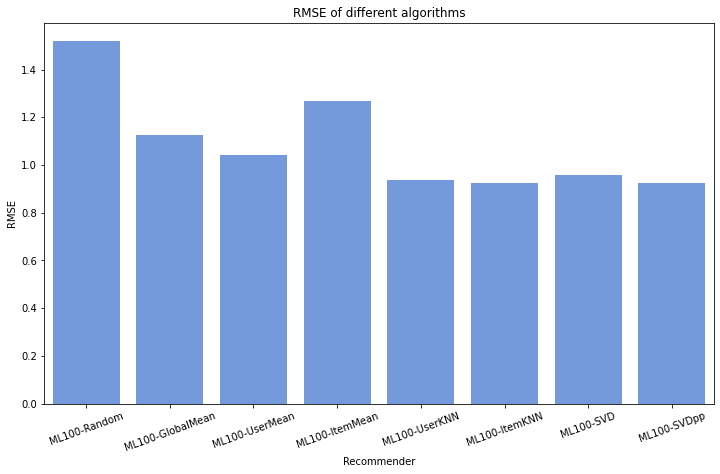

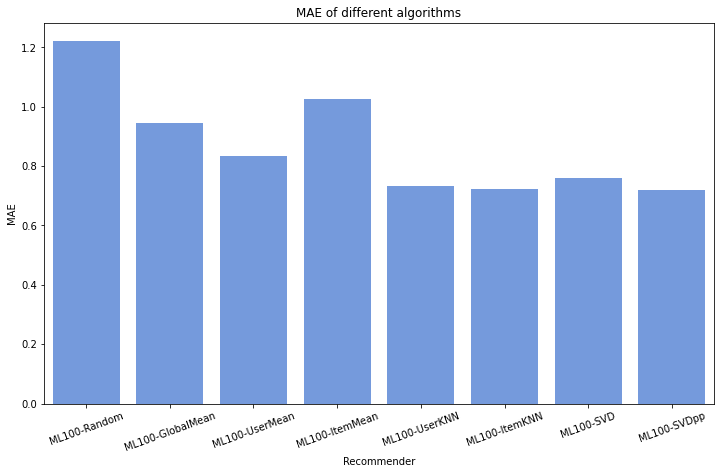

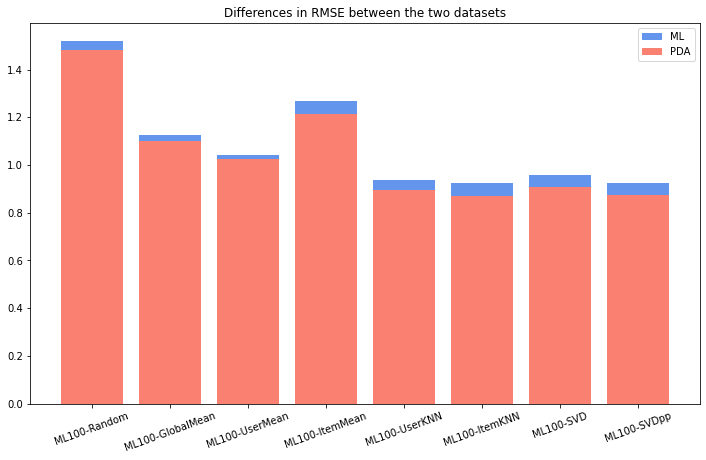

In [125]:
sns.barplot(x="Recommender", y="RMSE", data=ml100_rating_pred, color="cornflowerblue")
plt.xticks(rotation=20)
plt.title("RMSE of different algorithms")
plt.show()

sns.barplot(x="Recommender", y="MAE", data=ml100_rating_pred, color="cornflowerblue")
plt.xticks(rotation=20)
plt.title("MAE of different algorithms")
plt.show()

plt.bar(ml100_rating_pred["Recommender"], ml100_rating_pred["RMSE"], color="cornflowerblue", label="ML")
plt.bar(ml100_rating_pred["Recommender"], pda_rating_pred["RMSE"], color="salmon", label="PDA")
plt.xticks(rotation=20)
plt.title("Differences in RMSE between the two datasets")
plt.legend()
plt.show()

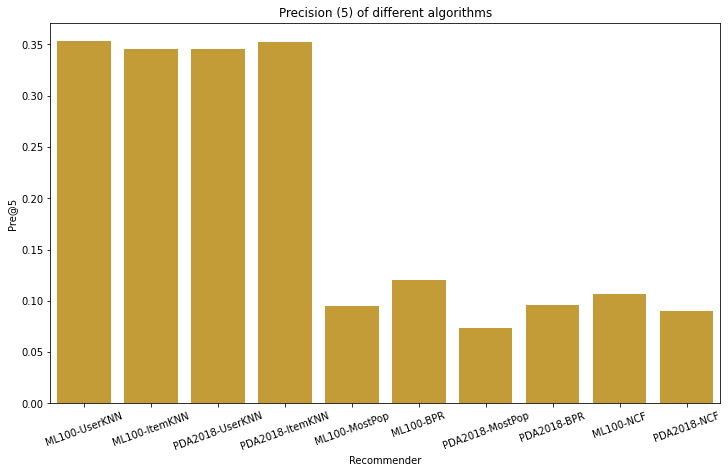

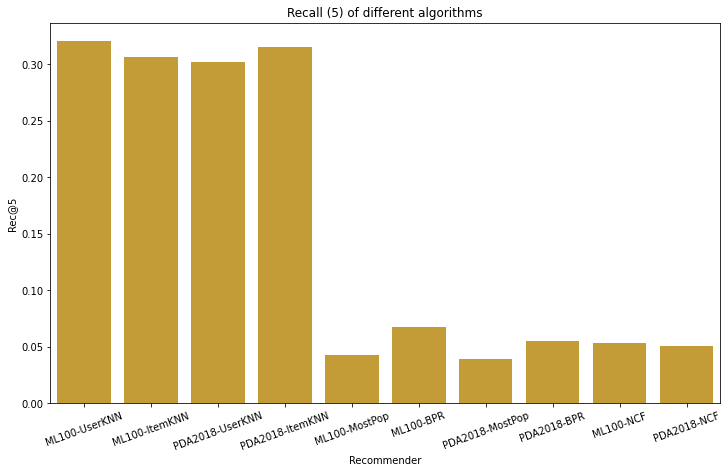

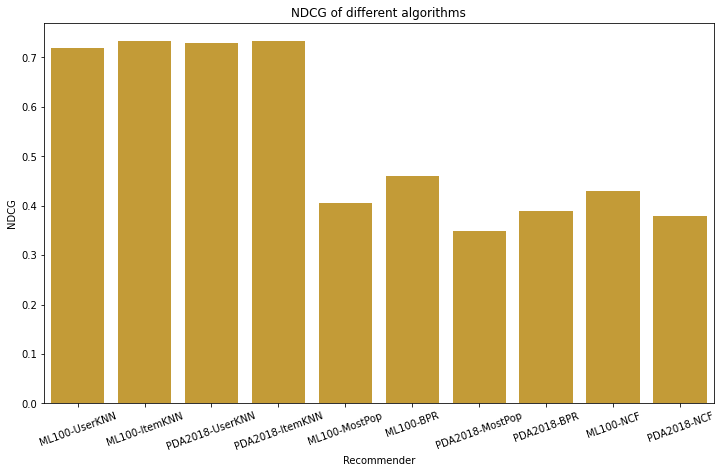

In [132]:
sns.barplot(x="Recommender", y="Pre@5", data=item_recom_results, color="goldenrod")
plt.xticks(rotation=20)
plt.title("Precision (5) of different algorithms")
plt.show()

sns.barplot(x="Recommender", y="Rec@5", data=item_recom_results, color="goldenrod")
plt.xticks(rotation=20)
plt.title("Recall (5) of different algorithms")
plt.show()


sns.barplot(x="Recommender", y="NDCG", data=item_recom_results, color="goldenrod")
plt.xticks(rotation=20)
plt.title("NDCG of different algorithms")
plt.show()